<a href="https://colab.research.google.com/github/Prajjwalbhojak/Projects/blob/main/Fifa_Dataset_Analysis_(Web_Scraping).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

#Web Scraping

Using Library -> Beautiful Soup

In [ ]:
url = "https://sofifa.com/players?offset_=1"
req = requests.get(url)

In [ ]:
#Checking the status code:
req

#if req = 200 that means we can scrape the data from it.

<Response [200]>

In [ ]:
soup = BeautifulSoup(req.content)
soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head>\n  <title>\n   Players FIFA 22 Sep 27, 2021 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FIFA 22 player ratings on Sep 27, 2021" name="description"/>\n  <meta content="Khachin Borjigin" name="author"/>\n  <meta content="2009 - 2021 SoFIFA.com" name="copyright"/>\n  <meta content="light" name="twitter:widgets:theme"/>\n  <meta content="#e6e6e6" name="twitter:widgets:border-color"/>\n  <link href="/launcher-icon.png" rel="shortcut icon"/>\n  <link href="/launcher-icon.png" rel="apple-touch-icon"/>\n  <link href="https://cdn.sofifa.com" rel="preconnect"/>\n  <link href="https://cdn.sofifa.com" rel="dns-prefetch"/>\n  <link href="https://pagead2.googlesyndication.com" rel="preconnect"/>\n  <link href="https://pagead2.googlesyndication.com" rel="dns-prefetch"/>\n  <script async="" crossorigin="anonymous" src="https://pagead2.googl

#Now we will perform:
1. Data Exploration
2. Data Cleaning
3. Data Manipulation

In [ ]:
arr = []
for i in soup.findAll('tr'):
  arr.append(i)

In [ ]:
del arr[0]

In [ ]:
arr[0]

<tr>
<td class="col-avatar" data-balloon="Click here!" data-balloon-pos="up" data-balloon-visible=""><figure class="avatar">
<img alt="" class="player-check" data-root="https://cdn.sofifa.com/players/" data-src="https://cdn.sofifa.com/players/259/816/22_60.png" data-srcset="https://cdn.sofifa.com/players/259/816/22_120.png 2x, https://cdn.sofifa.com/players/259/816/22_180.png 3x" data-type="player" id="259816" src="https://cdn.sofifa.com/players/notfound_0_60.png"/></figure></td>
<td class="col-name">
<a class="tooltip" data-tooltip="Abdallah Sima" href="/player/259816/abdallah-sima/220004/"><div class="bp3-text-overflow-ellipsis">A. Sima</div></a><img alt="" class="flag" data-src="https://cdn.sofifa.com/flags/sn.png" data-srcset="https://cdn.sofifa.com/flags/sn@2x.png 2x, https://cdn.sofifa.com/flags/sn@3x.png 3x" src="" title="Senegal"/> <a href="/players?pn=12" rel="nofollow"><span class="pos pos12">RM</span></a> <a href="/players?pn=25" rel="nofollow"><span class="pos pos25">ST</sp

In [ ]:
image_link = re.sub('<img.*data-srcset="| .*/>','',str(arr[0].find('img',{"class":"player-check"})))
image_link

'https://cdn.sofifa.com/players/259/816/22_120.png'

In [ ]:
Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(arr[0].find('a',{"class":"tooltip"})))
Name

'Abdallah Sima'

In [ ]:
Age = re.sub('<td.*">|</td>','',str(arr[0].find('td',{"class":"col"})))
Age

'20'

In [ ]:
OVA = re.sub('<td.*">|<.*>','',str(arr[0].find('td',{"class":"col col-oa"})))
OVA

'73'

In [ ]:
POT = re.sub('<td.*">|<.*>','',str(arr[0].find('td',{"class":"col col-pt"})))
POT

'86'

In [ ]:
Team = re.sub('<a.*">|<.*>','',str(arr[0].findAll('a')[-1]))
Team

'Stoke City'

In [ ]:
Duration = re.sub('<div.*">|</div>|\n','',str(arr[0].find('div',{"class":"sub"})))
Duration

'Jun 30, 2022 <span class="bp3-tag bp3-minimal bp3-intent-success">On Loan</span>'

In [ ]:
Value = re.sub('<td.*">€|M</td>','',str(arr[0].find('td',{"class":"col col-vl"})))
Value

'7.5'

In [ ]:
Wage = re.sub('<td.*">€|K</td>','',str(arr[0].find('td',{"class":"col col-wg"})))
Wage

'31'

In [ ]:
Total_stats = re.sub('<td.*">|</.*td>','',str(arr[0].find('td',{"class":"col col-tt"})))
Total_stats

'1888'

In [ ]:
lists = [[] for _ in range(10)]
count = 0

for i in soup.findAll('tr'):
  image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
  Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
  Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
  OVA = re.sub('<td.*">|<.*>','',str(i.find('td',{"class":"col col-oa"})))
  POT = re.sub('<td.*">|<.*>','',str(i.find('td',{"class":"col col-pt"})))
  Team = re.sub('<a.*">|<.*>','',str(i.findAll('a')[-1]))
  Duration = re.sub('<div.*">|</div>|\n','',str(i.find('div',{"class":"sub"})))
  Value = re.sub('<td.*">€|M</td>|0</td>','',str(i.find('td',{"class":"col col-vl"})))
  Wage = re.sub('<td.*">€|K</td>|0</td>','',str(i.find('td',{"class":"col col-wg"})))
  Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))

  lists[0].append(image_link)
  lists[1].append(Name)
  lists[2].append(Age)
  lists[3].append(OVA)
  lists[4].append(POT)
  lists[5].append(Team)
  lists[6].append(Duration)
  lists[7].append(Value)
  lists[8].append(Wage)
  lists[9].append(Total_stats)

In [ ]:
fifa = pd.DataFrame({'Image_link':lists[0],'Name':lists[1],'Age':lists[2],
                     'OVA':lists[3],'POT':lists[4],'Team':lists[5],'Duration':lists[6],
                     'Value':lists[7],'Wage':lists[8],'Total_stats':lists[9]})

In [ ]:
fifa

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,None,None,None,None,None,,None,None,None,None
1,https://cdn.sofifa.com/players/259/816/22_120.png,Abdallah Sima,20,73,86,Stoke City,"Jun 30, 2022 <span class=""bp3-tag bp3-minimal ...",7.5,31,1888
2,https://cdn.sofifa.com/players/242/816/22_120.png,Ricard Puig Martí,21,76,85,FC Barcelona,2018 ~ 2023,17,75,1907
3,https://cdn.sofifa.com/players/229/927/22_120.png,Gerson Santos da Silva,24,80,84,Olympique de Marseille,2021 ~ 2026,30,41,2132
4,https://cdn.sofifa.com/players/253/004/22_120.png,Anssumane Fati,18,76,90,FC Barcelona,2018 ~ 2022,17.5,44,1814
...,...,...,...,...,...,...,...,...,...,...
56,https://cdn.sofifa.com/players/251/804/22_120.png,Sergiño Dest,20,76,85,FC Barcelona,2020 ~ 2025,15.5,67,1974
57,https://cdn.sofifa.com/players/245/152/22_120.png,Santiago Giménez,20,71,86,Cruz Azul,2018 ~ 2023,4.5,29,1754
58,https://cdn.sofifa.com/players/228/702/22_120.png,Frenkie de Jong,24,87,92,FC Barcelona,2019 ~ 2026,119.5,210,2229
59,https://cdn.sofifa.com/players/226/161/22_120.png,Marcos Llorente Moreno,26,86,89,Atlético de Madrid,2019 ~ 2027,88,95,2252


In [ ]:
fifa.drop(0,inplace=True)

In [ ]:
fifa.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
1,https://cdn.sofifa.com/players/259/816/22_120.png,Abdallah Sima,20,73,86,Stoke City,"Jun 30, 2022 <span class=""bp3-tag bp3-minimal ...",7.5,31,1888
2,https://cdn.sofifa.com/players/242/816/22_120.png,Ricard Puig Martí,21,76,85,FC Barcelona,2018 ~ 2023,17,75,1907
3,https://cdn.sofifa.com/players/229/927/22_120.png,Gerson Santos da Silva,24,80,84,Olympique de Marseille,2021 ~ 2026,30,41,2132
4,https://cdn.sofifa.com/players/253/004/22_120.png,Anssumane Fati,18,76,90,FC Barcelona,2018 ~ 2022,17.5,44,1814
5,https://cdn.sofifa.com/players/232/938/22_120.png,Takehiro Tomiyasu,22,75,85,Arsenal,2021 ~ 2026,12,49,1754


In [ ]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_link   60 non-null     object
 1   Name         60 non-null     object
 2   Age          60 non-null     object
 3   OVA          60 non-null     object
 4   POT          60 non-null     object
 5   Team         60 non-null     object
 6   Duration     60 non-null     object
 7   Value        60 non-null     object
 8   Wage         60 non-null     object
 9   Total_stats  60 non-null     object
dtypes: object(10)
memory usage: 5.2+ KB


All the columns are of object data type but columns like age,OVA,POT,Value,Wage and Total stats they should be of numneric data type.

#So, we will change their data type to numeric:

In [ ]:
fifa['Age'] = pd.to_numeric(fifa['Age'])
fifa['OVA'] = pd.to_numeric(fifa['OVA'])
fifa['POT'] = pd.to_numeric(fifa['POT'])
fifa['Value'] = pd.to_numeric(fifa['Value'])
fifa['Wage'] = pd.to_numeric(fifa['Wage'])
fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])

In [ ]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   60 non-null     object 
 1   Name         60 non-null     object 
 2   Age          60 non-null     int64  
 3   OVA          60 non-null     int64  
 4   POT          60 non-null     int64  
 5   Team         60 non-null     object 
 6   Duration     60 non-null     object 
 7   Value        60 non-null     float64
 8   Wage         60 non-null     int64  
 9   Total_stats  60 non-null     int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 5.2+ KB


This is only the data from the page:1 , now I have to collect data from all the 10 pages:

#Collecting all the urls:

In [ ]:
urls = []
for i in range(1,11):
  url = f"https://sofifa.com/players?offset_={i}"
  urls.append(url)

print(urls)

['https://sofifa.com/players?offset_=1', 'https://sofifa.com/players?offset_=2', 'https://sofifa.com/players?offset_=3', 'https://sofifa.com/players?offset_=4', 'https://sofifa.com/players?offset_=5', 'https://sofifa.com/players?offset_=6', 'https://sofifa.com/players?offset_=7', 'https://sofifa.com/players?offset_=8', 'https://sofifa.com/players?offset_=9', 'https://sofifa.com/players?offset_=10']


#Data Collection for all the pages:

In [ ]:
fifa_final = pd.DataFrame()

for i in range(1,11):
  url = f"https://sofifa.com/players?offset_={i}"
  urls.append(url)
  req = requests.get(url)
  soup = BeautifulSoup(req.content)
  lists = [[] for _ in range(10)]


  for i in soup.findAll('tr'):
    image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
    Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
    Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
    OVA = re.sub('<td.*">|<.*>','',str(i.find('td',{"class":"col col-oa"})))
    POT = re.sub('<td.*">|<.*>','',str(i.find('td',{"class":"col col-pt"})))
    Team = re.sub('<a.*">|<.*>','',str(i.findAll('a')[-1]))
    Duration = re.sub('<div.*">|</div>|\n','',str(i.find('div',{"class":"sub"})))
    Value = re.sub('<td.*">€|M</td>|0</td>','',str(i.find('td',{"class":"col col-vl"})))
    Wage = re.sub('<td.*">€|K</td>|0</td>','',str(i.find('td',{"class":"col col-wg"})))
    Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))

    lists[0].append(image_link)
    lists[1].append(Name)
    lists[2].append(Age)
    lists[3].append(OVA)
    lists[4].append(POT)
    lists[5].append(Team)
    lists[6].append(Duration)
    lists[7].append(Value)
    lists[8].append(Wage)
    lists[9].append(Total_stats)

  fifa = pd.DataFrame({'Image_link':lists[0],'Name':lists[1],'Age':lists[2],
                     'OVA':lists[3],'POT':lists[4],'Team':lists[5],'Duration':lists[6],
                     'Value':lists[7],'Wage':lists[8],'Total_stats':lists[9]})
    
  fifa.drop(0,inplace=True)

  fifa['Age'] = pd.to_numeric(fifa['Age'])
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Value'] = pd.to_numeric(fifa['Value'])
  fifa['Wage'] = pd.to_numeric(fifa['Wage'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])

  fifa_final = fifa_final.append(fifa, ignore_index = True)

In [ ]:
fifa_final

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.com/players/259/816/22_120.png,Abdallah Sima,20,73,86,Stoke City,"Jun 30, 2022 <span class=""bp3-tag bp3-minimal ...",7.5,31,1888
1,https://cdn.sofifa.com/players/242/816/22_120.png,Ricard Puig Martí,21,76,85,FC Barcelona,2018 ~ 2023,17.0,75,1907
2,https://cdn.sofifa.com/players/229/927/22_120.png,Gerson Santos da Silva,24,80,84,Olympique de Marseille,2021 ~ 2026,30.0,41,2132
3,https://cdn.sofifa.com/players/253/004/22_120.png,Anssumane Fati,18,76,90,FC Barcelona,2018 ~ 2022,17.5,44,1814
4,https://cdn.sofifa.com/players/232/938/22_120.png,Takehiro Tomiyasu,22,75,85,Arsenal,2021 ~ 2026,12.0,49,1754
...,...,...,...,...,...,...,...,...,...,...
595,https://cdn.sofifa.com/players/251/804/22_120.png,Sergiño Dest,20,76,85,FC Barcelona,2020 ~ 2025,15.5,67,1974
596,https://cdn.sofifa.com/players/245/152/22_120.png,Santiago Giménez,20,71,86,Cruz Azul,2018 ~ 2023,4.5,29,1754
597,https://cdn.sofifa.com/players/228/702/22_120.png,Frenkie de Jong,24,87,92,FC Barcelona,2019 ~ 2026,119.5,210,2229
598,https://cdn.sofifa.com/players/226/161/22_120.png,Marcos Llorente Moreno,26,86,89,Atlético de Madrid,2019 ~ 2027,88.0,95,2252


In [ ]:
fifa_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   600 non-null    object 
 1   Name         600 non-null    object 
 2   Age          600 non-null    int64  
 3   OVA          600 non-null    int64  
 4   POT          600 non-null    int64  
 5   Team         600 non-null    object 
 6   Duration     600 non-null    object 
 7   Value        600 non-null    float64
 8   Wage         600 non-null    int64  
 9   Total_stats  600 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 47.0+ KB


#Rows with null values:

In [ ]:
is_NaN = fifa_final.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = fifa_final[row_has_NaN]

print(rows_with_NaN)

Empty DataFrame
Columns: [Image_link, Name, Age, OVA, POT, Team, Duration, Value, Wage, Total_stats]
Index: []


Removing columns: image link and duration as they are not going to help in analysis.


In [ ]:
fifa_final.drop(['Image_link','Duration'],inplace=True,axis = 1)

In [ ]:
fifa_final

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,Abdallah Sima,20,73,86,Stoke City,7.5,31,1888
1,Ricard Puig Martí,21,76,85,FC Barcelona,17.0,75,1907
2,Gerson Santos da Silva,24,80,84,Olympique de Marseille,30.0,41,2132
3,Anssumane Fati,18,76,90,FC Barcelona,17.5,44,1814
4,Takehiro Tomiyasu,22,75,85,Arsenal,12.0,49,1754
...,...,...,...,...,...,...,...,...
595,Sergiño Dest,20,76,85,FC Barcelona,15.5,67,1974
596,Santiago Giménez,20,71,86,Cruz Azul,4.5,29,1754
597,Frenkie de Jong,24,87,92,FC Barcelona,119.5,210,2229
598,Marcos Llorente Moreno,26,86,89,Atlético de Madrid,88.0,95,2252


#**EDA Analysis:**

In [ ]:
fifa_final.isnull().sum()

Name           0
Age            0
OVA            0
POT            0
Team           0
Value          0
Wage           0
Total_stats    0
dtype: int64

In [ ]:
fifa_final.describe()

,Age,OVA,POT,Value,Wage,Total_stats
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,20.816667,78.100000,87.650000,37.250000,61.066667,1934.583333
std,3.474167,6.313195,2.543938,36.722924,65.508889,184.737262
min,16.000000,63.000000,82.000000,1.500000,3.000000,1502.000000
25%,18.000000,75.000000,86.000000,12.375000,17.750000,1788.750000
50%,20.000000,78.000000,87.500000,28.750000,44.000000,1947.500000
75%,22.000000,82.000000,89.000000,49.125000,74.250000,2080.000000
max,36.000000,93.000000,95.000000,194.000000,320.000000,2252.000000


#1. Name of the player who is having the highest average:

In [ ]:
fifa_final[fifa_final['Wage'] == max(fifa_final['Wage'])]['Name']

22     Lionel Messi
82     Lionel Messi
142    Lionel Messi
202    Lionel Messi
262    Lionel Messi
322    Lionel Messi
382    Lionel Messi
442    Lionel Messi
502    Lionel Messi
562    Lionel Messi
Name: Name, dtype: object

2. Now drop the duplicate data:

In [ ]:
fifa_final.duplicated().sum(axis = 0)

540

In [ ]:
fifa_final.drop_duplicates(inplace = True)

In [ ]:
fifa_final.tail()

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
55,Sergiño Dest,20,76,85,FC Barcelona,15.5,67,1974
56,Santiago Giménez,20,71,86,Cruz Azul,4.5,29,1754
57,Frenkie de Jong,24,87,92,FC Barcelona,119.5,210,2229
58,Marcos Llorente Moreno,26,86,89,Atlético de Madrid,88.0,95,2252
59,Achraf Hakimi,22,85,88,Paris Saint-Germain,69.5,100,2188


In [ ]:
fifa_final[fifa_final['Wage'] == max(fifa_final['Wage'])]['Name']

22    Lionel Messi
Name: Name, dtype: object

So, Among all the players, that Lionel Messi is the highest paid athelete.

#2 Find the youngest player and the oldest player

In [ ]:
# Youngest Player:

fifa_final[fifa_final['Age']==min(fifa_final['Age'])]['Name'],fifa_final[fifa_final['Age']==min(fifa_final['Age'])]['Age']

(19    Pablo Martín Páez Gavira
 Name: Name, dtype: object, 19    16
 Name: Age, dtype: int64)

In [ ]:
# Oldest Player:

fifa_final[fifa_final['Age']==max(fifa_final['Age'])]['Name'], fifa_final[fifa_final['Age']==max(fifa_final['Age'])]['Age']

(27    C. Ronaldo dos Santos Aveiro
 Name: Name, dtype: object, 27    36
 Name: Age, dtype: int64)

#3: Top 10 players according to their POT:

In [ ]:
fifa_final.sort_values(by = 'POT',ascending=False)['Name'].head(10)

34                   Kylian Mbappé
22                    Lionel Messi
8                   Erling Haaland
51                      Phil Foden
57                 Frenkie de Jong
5             Pedro González López
10                 Federico Chiesa
27    C. Ronaldo dos Santos Aveiro
47                    Jadon Sancho
3                   Anssumane Fati
Name: Name, dtype: object

#4. Create a new data frame with the values of columns - name and pot

In [ ]:
new_df = fifa_final[['Name','POT']]

In [ ]:
new_df.head(10)

,Name,POT
0,Abdallah Sima,86
1,Ricard Puig Martí,85
2,Gerson Santos da Silva,84
3,Anssumane Fati,90
4,Takehiro Tomiyasu,85
5,Pedro González López,91
6,Neal Maupay,82
7,Christian Pulisic,88
8,Erling Haaland,93
9,Nuno Alexandre Tavares Mendes,88


#Now plot a graph - players name vs players POT 

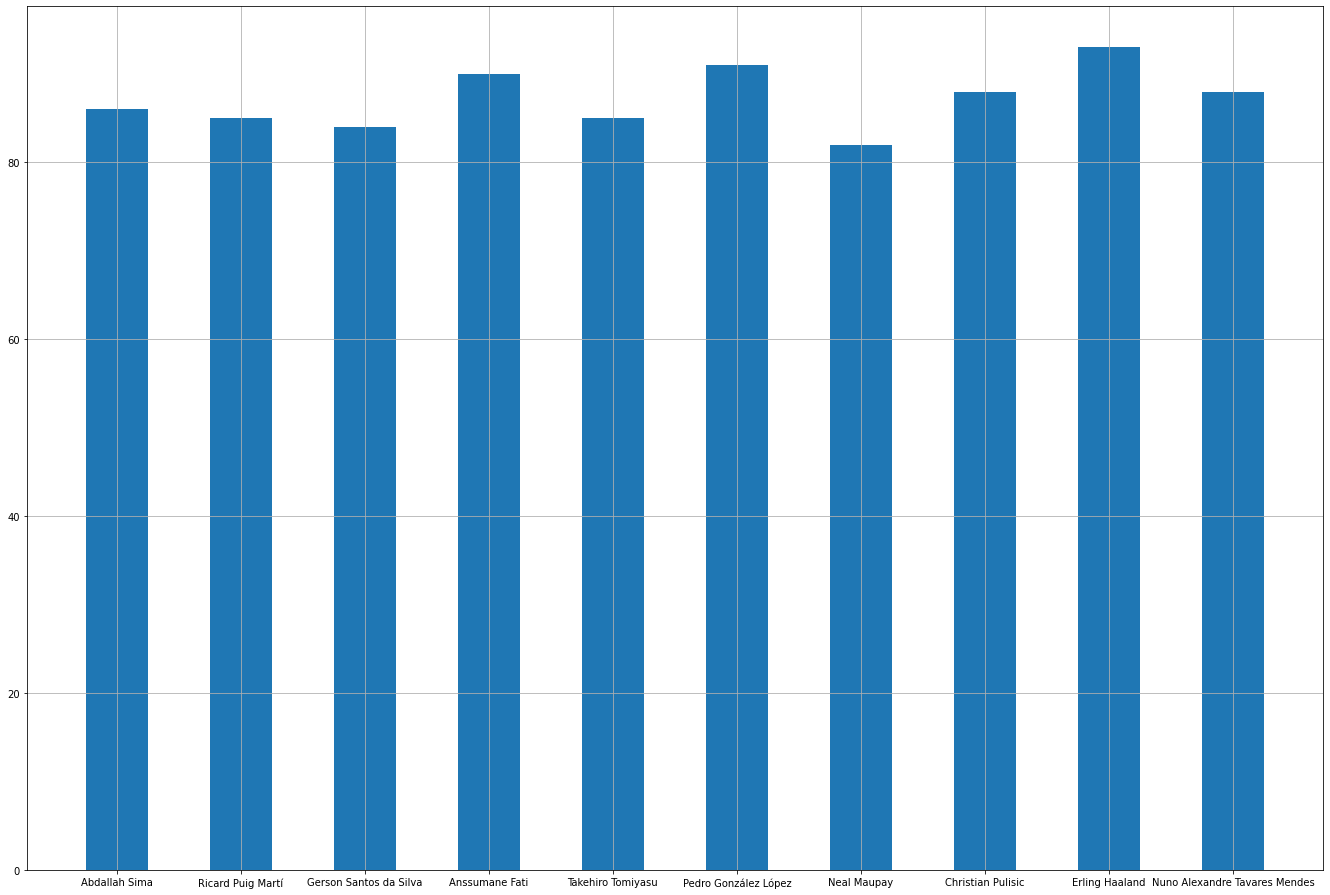

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt = fig.add_axes([1,1,3,3])

x = new_df['Name'].head(10)
y = new_df['POT'].head(10)
plt.bar(x,y,width = 0.5)
plt.grid()

#5 Plot a graph - Player's name vs Player's Wage of the Top 10 players:

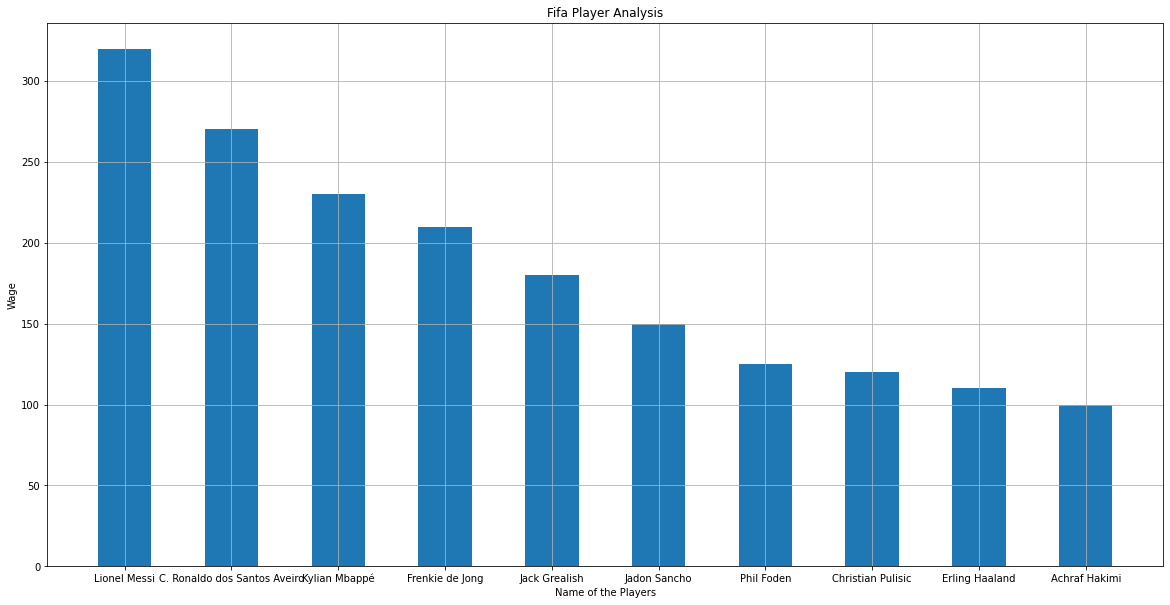

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))

df = fifa_final.sort_values(by = 'Wage',ascending=False).head(10)
x = df['Name']
y = df['Wage']
plt.xlabel("Name of the Players")
plt.ylabel("Wage")
plt.title("Fifa Player Analysis")
plt.bar(x,y,width = 0.5)
plt.grid()

#6 Find all the players whose potential is more than equal to 90

In [ ]:
fifa_final[fifa_final['POT']>=90]

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
3,Anssumane Fati,18,76,90,FC Barcelona,17.5,44,1814
5,Pedro González López,18,81,91,FC Barcelona,54.0,51,2023
8,Erling Haaland,20,88,93,Borussia Dortmund,137.5,110,2102
10,Federico Chiesa,23,83,91,Juventus,80.5,74,2052
13,Ryan Gravenberch,19,78,90,Ajax,33.0,11,2074
22,Lionel Messi,34,93,93,Paris Saint-Germain,78.0,320,2219
27,C. Ronaldo dos Santos Aveiro,36,91,91,Manchester United,45.0,270,2208
34,Kylian Mbappé,22,91,95,Paris Saint-Germain,194.0,230,2175
45,Theo Hernández,23,84,90,AC Milan,62.5,51,2185
47,Jadon Sancho,21,87,91,Manchester United,116.5,150,2007


#7 Find all the players whose potential is more than 90 and the age < 20

In [ ]:
fifa_final[(fifa_final['POT']>90) & (fifa_final['Age']<20)]

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
5,Pedro González López,18,81,91,FC Barcelona,54.0,51,2023


#8 Find all the players whose values are greater than 10 but wage < 50

In [ ]:
fifa_final[(fifa_final['Value']>10) & (fifa_final['Wage']<50)]['Name']

2            Gerson Santos da Silva
3                    Anssumane Fati
4                 Takehiro Tomiyasu
9     Nuno Alexandre Tavares Mendes
12                  Jude Bellingham
13                 Ryan Gravenberch
14                    Florian Wirtz
15                     Noni Madueke
18                Giacomo Raspadori
20                Eduardo Camavinga
24                  Maxence Lacroix
28                 Emile Smith Rowe
31                    Jamal Musiala
33                   Joško Gvardiol
35        Antony Matheus dos Santos
38                     Jules Koundé
40                   Giovanni Reyna
48                      Jérémy Doku
50                 Mikkel Damsgaard
52                   Jurriën Timber
53                         Noa Lang
Name: Name, dtype: object

#Finding corelation:

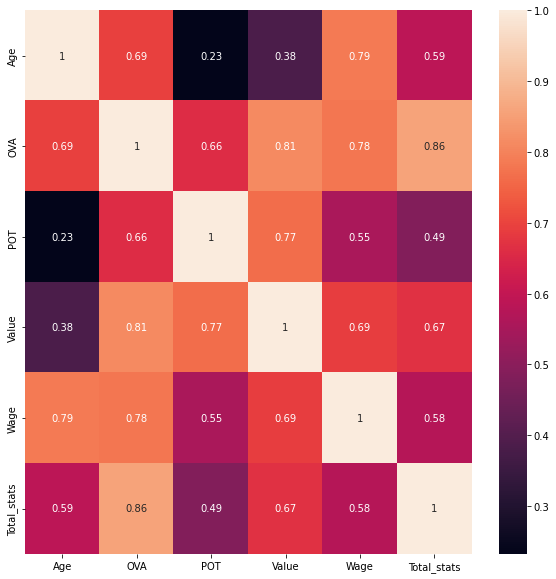

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(fifa_final.corr(), annot=True)